<a href="https://colab.research.google.com/github/Udhay2898/Churn-Analysis-Telecom/blob/Master/Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Sets/Telecom Churn.csv')

df.sample(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
283,MI,86,415,370-8463,no,yes,28,221.6,74,37.67,...,100,24.51,240.3,105,10.81,9.0,2,2.43,1,False
2756,KS,123,415,378-2432,no,no,0,140.0,106,23.80,...,101,13.06,50.1,87,2.25,12.5,1,3.38,2,False
367,MD,45,415,350-1040,no,no,0,78.2,127,13.29,...,108,21.54,255.0,100,11.48,18.0,3,4.86,1,False


In [ ]:
#Exlporing Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [ ]:
df.shape

(3333, 21)

In [ ]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [ ]:
#Drop the Columns

df = df.drop(columns = ['account length'])

In [ ]:
df.columns

Index(['state', 'area code', 'phone number', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

In [ ]:
for column in df.columns:
  unique_value = df[column].unique()
  print(f"{column} :\n {unique_value}\n")

state :
 ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

area code :
 [415 408 510]

phone number :
 ['382-4657' '371-7191' '358-1921' ... '328-8230' '364-6381' '400-4344']

international plan :
 ['no' 'yes']

voice mail plan :
 ['yes' 'no']

number vmail messages :
 [25 26  0 24 37 27 33 39 30 41 28 34 46 29 35 21 32 42 36 22 23 43 31 38
 40 48 18 17 45 16 20 14 19 51 15 11 12 47  8 44 49  4 10 13 50  9]

total day minutes :
 [265.1 161.6 243.4 ... 321.1 231.1 180.8]

total day calls :
 [110 123 114  71 113  98  88  79  97  84 137 127  96  70  67 139  66  90
 117  89 112 103  86  76 115  73 109  95 105 121 118  94  80 128  64 106
 102  85  82  77 120 133 135 108  57  83 129  91  92  74  93 101 146  72
  99 104 125  61 100  87 131  65 124 119  52  68 107  47 116 151 126 122
 1

In [ ]:
df.nunique()

,0
state,51
area code,3
phone number,3333
international plan,2
voice mail plan,2
number vmail messages,46
total day minutes,1667
total day calls,119
total day charge,1667
total eve minutes,1611


In [ ]:
df.describe()

,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes

,0
state,object
area code,int64
phone number,object
international plan,object
voice mail plan,object
number vmail messages,int64
total day minutes,float64
total day calls,int64
total day charge,float64
total eve minutes,float64


**Churn Count**

In [ ]:
churn = df['churn'].value_counts()

churn

,count
churn,
False,2850
True,483


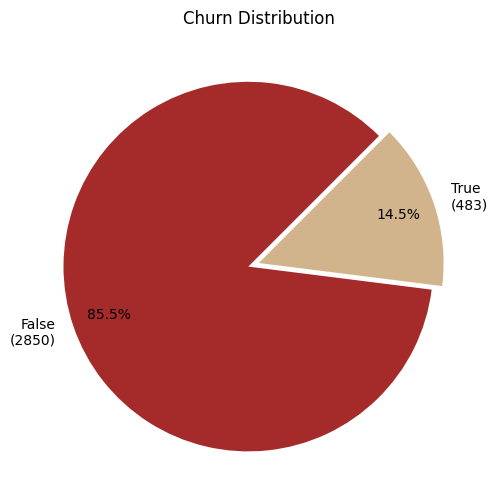

In [ ]:
churn_index = churn.index

labels_with_counts = [f'{label}\n({count})' for label, count in zip(churn_index, churn)]

plt.figure(figsize=(8, 6))
plt.pie(churn, labels = labels_with_counts, autopct = '%1.1f%%', startangle = 45, colors = ["#A52A2A", "#D2B48C"], explode=(0.06, 0), pctdistance=0.8)
plt.title('Churn Distribution')

plt.show()

**Total Customers: 3,333**

**Churned Customers: 483 (14.5%)**

**Non-Churned Customers: 2,850 (85.5%)**

This indicates that a relatively small proportion of customers ***(14.5%)*** have churned compared to those who have not.

This shows a relatively low churn rate.

**Churn by State**

In [ ]:
state_df = df.groupby(['state', 'area code', 'churn']).size().reset_index(name='count')

state_df = state_df.pivot_table(index = ['state','area code'],columns = 'churn',values = 'count',fill_value=0)

state_df['total_churn'] = state_df.sum(axis=1)
state_df = state_df.nlargest(10,'total_churn')

state_df = state_df.drop(columns = ['total_churn'])

state_df

,churn,False,True
state,area code,,
WV,415,49.0,3.0
NY,415,37.0,10.0
OR,415,36.0,8.0
ID,415,33.0,8.0
WY,415,36.0,5.0
AL,415,37.0,3.0
MN,415,33.0,7.0
OH,415,36.0,4.0
CT,415,30.0,9.0


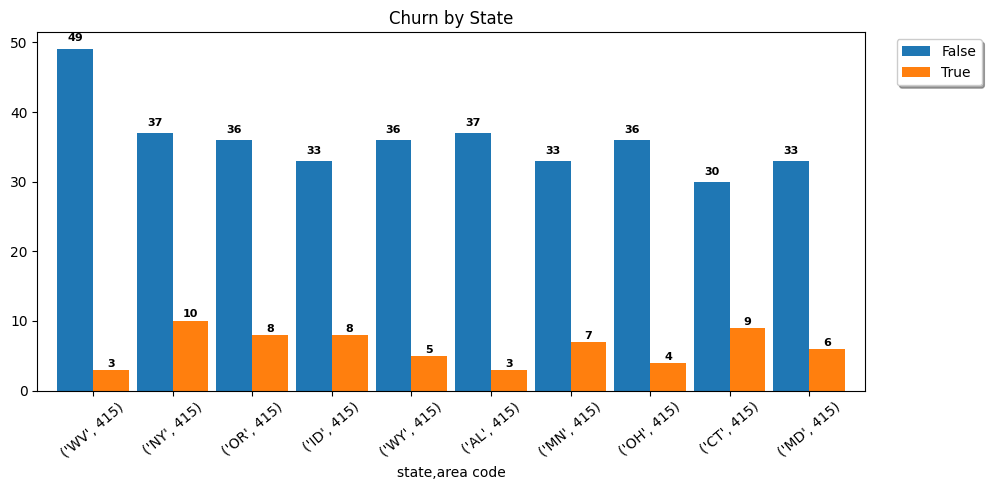

In [ ]:
# Churn by State

bar_width = 0.9

ax = state_df.plot.bar(figsize = (10,5),width = bar_width,title = 'Churn by State')


for container in ax.containers:
  for bar in container:
    height = bar.get_height()
    label = f'{int(height)}'
    ax.text(bar.get_x()+bar.get_width() / 2,    # X axis
            height + 0.02 * height,             # Y axis
            label,                              # Label text
            ha='center',                        # Horizontal alignment
            va='bottom',                        # Vertical alignment
            fontsize=8,                         # Font size
            fontweight='bold'                   # Make text bold
            )

tick = range(len(state_df))
plt.xticks(ticks = tick,labels = state_df.index,rotation = 40)

plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left', fancybox=True, shadow=True)
plt.tight_layout()
plt.show()

This chart highlights the top 10 states with the highest number of customers who churned.

The data shows states like West Virginia (WV), New York (NY), and Oregon (OR) among the top regions with the highest churn counts.

In [ ]:
avg_state_df = df.groupby(['state']).agg({'total day minutes' : 'mean',
                                       'total eve minutes' : 'mean',
                                       'total night minutes' : 'mean'}).reset_index()


# Get the top 10 states based on 'total day minutes'

avg_state_df = avg_state_df.nlargest(10, 'total day minutes').round(2)

avg_state_df = avg_state_df.pivot_table(index = 'state', values = ['total day minutes',	'total eve minutes',	'total night minutes'])

avg_state_df

,total day minutes,total eve minutes,total night minutes
state,,,
AL,186.01,195.46,187.28
IN,196.53,202.56,210.24
KS,191.56,202.51,203.97
MD,197.23,196.06,198.61
ME,185.26,200.51,198.83
NC,185.15,202.54,197.14
ND,187.34,207.78,199.80
NJ,196.22,198.29,206.38
PA,188.38,191.65,195.86


**Average Call Duration by Type**

visualization compares average call durations during different times of the day and international calls across states. It highlights usage patterns, which can guide personalized plan offerings.

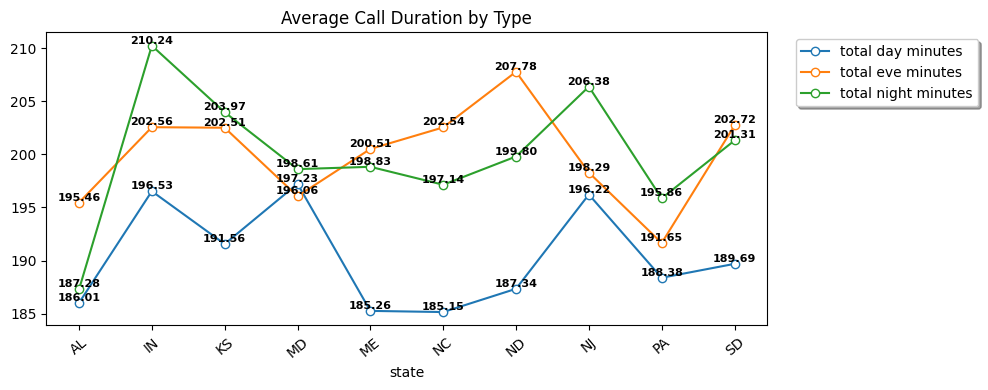

In [ ]:
ax = avg_state_df.plot.line(figsize=(10, 4),marker = 'o',markerfacecolor='white',title='Average Call Duration by Type')

for line in ax.get_lines():
    xdata = line.get_xdata()
    ydata = line.get_ydata()

    for i in range(len(xdata)):
        ax.text(
            xdata[i],                          # X axis position
            ydata[i],                          # Y axis position (adjusted for visibility)
            f'{ydata[i]:.2f}',                 # Label text (formatted to 2 decimal places)
            ha='center',                       # Horizontal alignment
            va='bottom',                       # Vertical alignment
            fontsize=8,                        # Font size
            fontweight='bold'                  # Make text bold
        )

tick = range(len(avg_state_df))
plt.xticks(ticks=tick, labels=avg_state_df.index, rotation = 40)
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left', fancybox=True, shadow=True)

plt.tight_layout()
plt.show()

The data reveals notable variations in call durations across states.

States such as IN and NJ exhibit the highest average durations, particularly in the evening and night categories, which may indicate greater communication needs or activity.
Conversely, states like AL and PA show lower average durations, suggesting less intense usage patterns.

**Average Charge by Plan**

In [ ]:
plan_df = df.groupby(['state']).agg({'total day charge' : 'mean',
                                   'total eve charge' : 'mean',
                                   'total night charge' : 'mean'}).reset_index()

plan_df = plan_df.nlargest(10, 'total day charge').round(2)
plan_df = plan_df.pivot_table(index = 'state',values = ['total day charge','total eve charge','total night charge'])

plan_df



,total day charge,total eve charge,total night charge
state,,,
AL,31.62,16.61,8.43
IN,33.41,17.22,9.46
KS,32.57,17.21,9.18
MD,33.53,16.67,8.94
ME,31.50,17.04,8.95
NC,31.48,17.22,8.87
ND,31.85,17.66,8.99
NJ,33.36,16.85,9.29
PA,32.02,16.29,8.81


This line chart illustrates the average charges incurred by customers across different states and time periods.

It helps to identify which states and plans generate the most revenue.

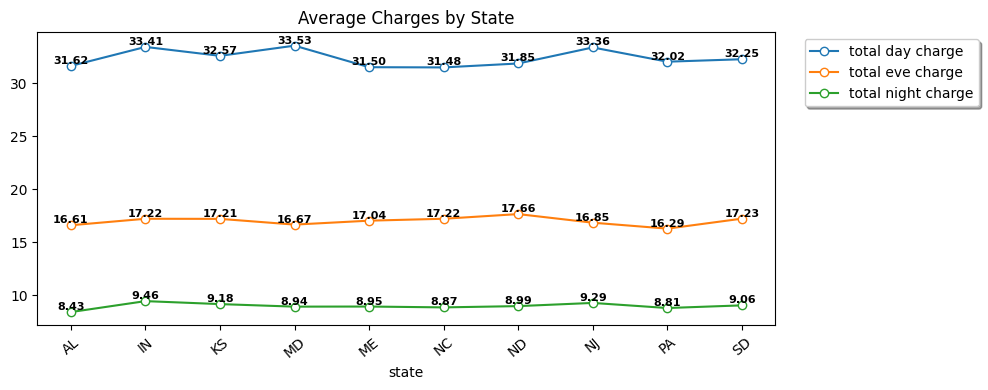

In [ ]:
ax = plan_df.plot.line(figsize=(10, 4), marker='o', markerfacecolor='white', title='Average Charges by State')

for line in ax.get_lines():
    xdata = line.get_xdata()
    ydata = line.get_ydata()

    for i in range(len(xdata)):
        ax.text(
            xdata[i],                          # X axis position
            ydata[i],                          # Y axis position
            f'{ydata[i]:.2f}',                 # Label text (formatted to 2 decimal places)
            ha='center',                       # Horizontal alignment
            va='bottom',                       # Vertical alignment
            fontsize=8,                        # Font size
            fontweight='bold'                  # Make text bold
        )

tick = range(len(plan_df.index))
plt.xticks(ticks=tick, labels=plan_df.index, rotation=40)

plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left', fancybox=True, shadow=True)

plt.tight_layout()
plt.show()

The average total day charge is 32.03, with Maryland having the highest at 33.53 and North Carolina the lowest at 31.48.

For evening calls, the average charge is 17.17, with North Dakota at the top (17.66) and Pennsylvania at the bottom (16.29).

Night call charges average 8.95, with Indiana having the highest charge of 9.46 and Alabama the lowest at 8.43.

Overall, charges vary moderately across states, with Maryland and Indiana recording the highest costs in their respective categories.

**Customer Service Calls vs Churn**

In [ ]:
service_df = df.groupby(['customer service calls','churn']).agg({'phone number' : 'count'}).reset_index()

service_df = service_df.pivot_table(index = 'customer service calls',columns = 'churn',values = 'phone number',fill_value = 0)

service_df_true = service_df[True].reset_index(name='Churn True').sort_values(by='customer service calls', ascending=True)

service_df_false = service_df[False].reset_index(name='Churn False').sort_values(by='customer service calls', ascending=True)

service_df

churn,False,True
customer service calls,,
0,605.0,92.0
1,1059.0,122.0
2,672.0,87.0
3,385.0,44.0
4,90.0,76.0
5,26.0,40.0
6,8.0,14.0
7,4.0,5.0
8,1.0,1.0


This chart shows the relationship between the number of customer service calls and churn.

**Churn = False :** Represents customers who did not churn.

**Churn = True :** Represents customers who did churn.

In [ ]:
fig_true = px.pie(service_df_true,
             values='Churn True',
             names='customer service calls',
             title='Distribution of Customer Service Calls for Churned Customers',
             hole=0.3,
             labels={'label_with_count': 'Customer Service Calls (Count)'},
             color_discrete_sequence=['#1A5319','#508D4E','#80AF81','#06D001','#059212','#729762','#597445','#8DECB4','#808836'])


fig_false = px.pie(service_df_false,
             values='Churn False',
             names='customer service calls',
             title='Distribution of Customer Service Calls for Churned Customers',
             hole=0.3,
             labels={'label_with_count': 'Customer Service Calls (Count)'},
             color_discrete_sequence=['#1A5319','#508D4E','#80AF81','#06D001','#059212','#729762','#597445','#8DECB4','#808836'])



fig_true.update_layout(height=600, width=800, title_x=0.5)

fig_false.update_layout(height=600, width=800, title_x=0.5)

fig_true.show()
fig_true.show()

The trend indicates that while many customers remain with the company without engaging much with customer service, **those who interact more frequently are at a higher risk of churning**.

**Distribution of International Plan for Churned Customers**

In [ ]:
int_df = df.groupby(['international plan', 'churn']).agg({'phone number' : 'count'}).reset_index()

int_df = int_df.pivot_table(index = 'international plan',columns = 'churn',values = 'phone number',fill_value = 0)
int_df.columns = ['Churn False', 'Churn True']

int_df.sort_values(by='international plan', ascending=True)

,Churn False,Churn True
international plan,,
no,2664.0,346.0
yes,186.0,137.0


 provides insights into how the availability of an international plan correlates with customer churn.

 Specifically, it categorizes customers based on whether they have subscribed to an international plan and whether they have churned or not.

In [ ]:
fig_true_int = px.pie(int_df,
             values='Churn True',
             names=int_df.index,  # Use the index for names
             title='Distribution of International Plan for Churned Customers',
             hole=0.3,
             labels = int_df.index,
             color_discrete_sequence=['#1A5319','#508D4E'])

fig_false_int = px.pie(int_df,
             values='Churn False',
             names=int_df.index,  # Use the index for names
             title='Distribution of International Plan for Non-Churned Customers',
             hole=0.3,
             labels = int_df.index,
             color_discrete_sequence=['#1A5319','#508D4E'])

fig_true_int.update_layout(height=600, width=800, title_x=0.5)
fig_false_int.update_layout(height=600, width=800, title_x=0.5)

fig_true_int.show()
fig_false_int.show()



**Summary of International Plan and Churn Status:**

**Customers without an International Plan:**

2,664 customers did not churn.
346 customers churned.

**Customers with an International Plan:**

186 customers did not churn.
137 customers churned.

**Conclusion :**

**Impact of High Usage on Churn:**

**Total Day and Evening Minutes/Charges:** Customers with high day and evening usage (minutes and corresponding charges) are likely paying more, which could lead to dissatisfaction, especially if they feel the charges are too high.

This group may be more price-sensitive, making them more likely to churn if they perceive better value elsewhere.

**Total Night Usage:** Similar to day and evening usage, high night usage might indicate heavy reliance on the service during these hours.

However, night rates might be lower, which could mitigate churn risks unless night charges increase.


**Customer Service Interactions:**

**Frequency of Customer Service Calls:** The data shows an average of 1.56 customer service calls per customer, with some making up to 9 calls.

Frequent interactions with customer service could indicate unresolved issues or dissatisfaction.

Customers who make more calls to customer service may feel frustrated if their problems aren’t resolved quickly, leading to a higher likelihood of churn.

**Low Number of Customer Service Calls:** On the flip side, customers who rarely contact customer service might be more satisfied or less engaged.

These customers could be at risk of churning if they feel neglected or if they have low brand loyalty.



**Impact of International Plan Usage:**

**Low International Usage:** The low average for international minutes and calls suggests that this is a less critical service for most customers.

However, for those who do use international services, the value they derive from these plans might make them less likely to churn.

**High International Charges:** Customers with higher international charges may churn if they find more cost-effective options elsewhere, especially if they feel the rates are too high or if alternative providers offer better international calling plans.



**Voicemail Usage and Churn:**

**No Voicemail Usage:** The data indicates that a significant portion of customers do not use voicemail services.

These customers might churn if they feel they are paying for services they don’t use or if alternative providers offer more attractive packages without unnecessary features.

**High Voicemail Usage:** Customers who do use voicemail heavily might be more engaged and less likely to churn, particularly if they rely on this service for personal or professional communication.



**Area Code Distribution and Regional Churn Trends:**

**Geographic Variation:** Area codes ranging from 408 to 510 suggest a customer base spread across different regions.

Regional differences in service quality, pricing, or competition could influence churn rates.

For example, customers in areas with poor network coverage or higher competition may be more likely to churn.


**Targeted Regional Retention Strategies:** Understanding regional churn trends could allow for more targeted retention strategies, such as offering region-specific promotions or improving network infrastructure in areas with higher churn.



**Customer Segmentation by Usage Patterns:**

**High vs. Low Callers:** Customers can be segmented into high and low callers. High callers, especially those with high day or evening charges, might churn if they feel overcharged.

Low callers may churn if they feel they aren’t getting enough value for their money.

**Heavy vs. Light Data Users**: Similarly, heavy data users might be more prone to churn if they exceed their data limits and face overage charges.

Offering more flexible or unlimited data plans could help retain these customers.



**Potential Churn Mitigation Strategies:**

**Personalized Offers**: Based on usage patterns, personalized offers (e.g., discounts for heavy users, better international rates) could reduce churn by addressing specific customer needs.

**Enhanced Customer Service:** Improving the customer service experience, particularly for those who frequently contact support, could reduce churn by resolving issues more effectively and improving customer satisfaction.

**Loyalty Programs:** Implementing loyalty programs that reward long-term customers or those with high usage can enhance customer retention by increasing perceived value and discouraging churn.

By understanding these factors, telecom companies can better anticipate and address the reasons why customers might leave, leading to more effective churn prevention strategies to churn, especially if they find the plans beneficial.